# model evalulation matrix(confusion matrix,precision,recall,F1)

why metrics matter?
- imagine a model that predicts disease
- not caring about overall accuracy
- you just want to know
- how many sick people are caught(recall)
- how often the model gives current alerts(precision)
- how balanced the performance is (F1 score)

key metrics 
| metric | meaning |
|--------|----------|
| accuracy | percentage of total correct prediction |
| precision | out of predicted positives how many are correctly predicted |
| recall | out of actual positives how many detected |
| F1 | balance between precision and recall(good when classes are imbalanced) | 

visual confusion metrics 
|| predicted positive | predicted negative |
|----|--------------------|---------------------|
| actual positive | True Positive(TP) | False Negative(FN) |
| actual negative | False Positive (FP) | True Negative (TN)|


Formulas
1. accuracy = (TP + TN)/total
2. precision = TP/ (TP + FP)
3. recall = TP/ (TP + FN)
4. F1 score = 2*(precision*recall)/ (precision + recall)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [46]:
data= load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['species']=data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
X=df.drop('species',axis=1)
y=df['species']
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

## KNN model

In [49]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [50]:
y_pred=KNN.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 0.9466666666666667


In [51]:
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

confusion matrix:
 [[29  0  0]
 [ 0 23  0]
 [ 0  4 19]]


In [52]:
print('classificaion report',classification_report(y_test,y_pred))

classificaion report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.85      1.00      0.92        23
           2       1.00      0.83      0.90        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



In [53]:
print(precision_score(y_test,y_pred,average='macro'))

0.9506172839506174


In [55]:
print(recall_score(y_test,y_pred,average='macro'))

0.9420289855072465


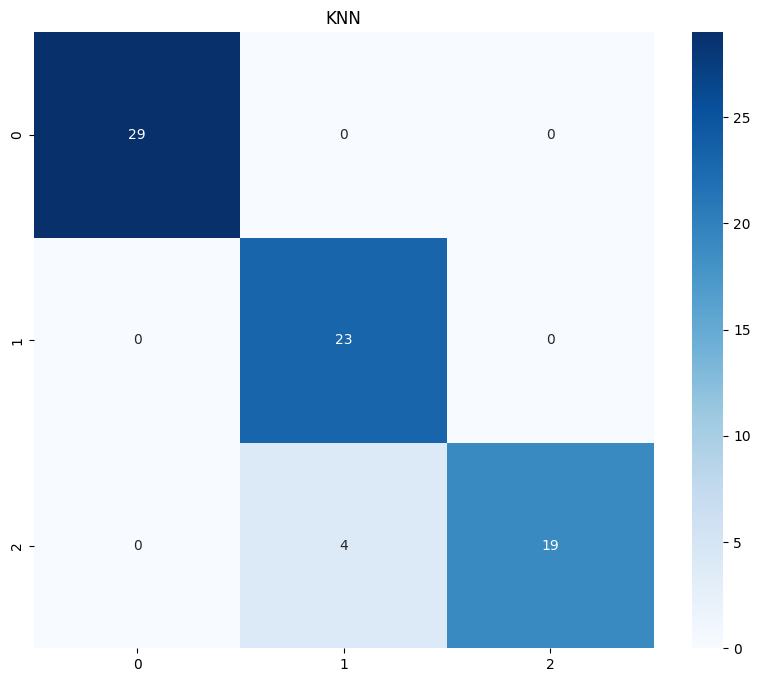

In [58]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot= True, fmt='d',cmap='Blues')
plt.title('KNN')
plt.xlabel('')
plt.ylabel('')
plt.show()